<img src='pics/otus.png'>

In [3]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

# Методы оптимизации

### Задача

как найти минимум функции $f(x), x \in R$

In [11]:
import numpy as np
objective = np.poly1d([1.3, 4.0, 0.6])
print(objective)

     2
1.3 x + 4 x + 0.6


In [12]:
import scipy.optimize as opt
x_ = opt.fmin(objective, [3])
print("solved: x={}".format(x_))

Optimization terminated successfully.
         Current function value: -2.476923
         Iterations: 20
         Function evaluations: 40
solved: x=[-1.53845215]


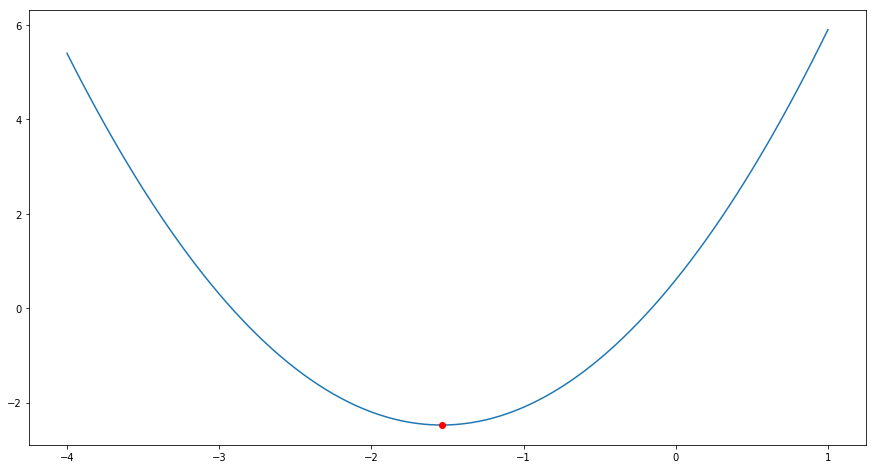

In [13]:
x = np.linspace(-4,1,101)
import matplotlib.pylab as mpl
mpl.plot(x, objective(x))
mpl.plot(x_, objective(x_), 'ro')

## Gradient Descent

<img src='pics/grad.png'>

Цель - найти минимум некоторой функции.  
А именно найти параметры $\theta$ заданной модели, при которых значение функции ошибки $L$ минимально.

Метод градиентного спуска заключается в итеративном и одновременном обновлении значений $\theta$ в направлении, противоположному градиенту:
$$ \theta := \theta - \alpha\frac{\partial L}{\partial \theta}$$

* $\alpha$ -  скорость спуска


## Задача:
когда алгоритм останавливается?

## Псевдокод алгоритма

```{python}
1.function gd(X, alpha, epsilon):
2.    initialise theta 
3.    do: 
4.        theta = new_theta
5.        new_theta = theta - alpha * grad(X, theta)
6.    until dist(new_theta, theta) < epsilon
7.    return theta
```

Проблема - на каждом шаге используется вся обучающая выборка. Нельзя реализовать онлайн обучение.

## Стохастический градиентный спуск

Проблема - используется вся обучающая выборка на каждом шаге алгоритма  
Решение - использовать один (или несколько - mini-batch) случайный элемент выборки

### Градиентный спуск

```{python}
1.function gd(X, alpha, epsilon):
2.    initialise theta 
3.    do: 
4.        theta = new_theta
5.        new_theta = theta - alpha * grad(X, theta)
6.    until dist(new_theta, theta) < epsilon
7.    return theta
```

### Стохастический градиентный спуск

```{python}
1.function sgd(X, alpha, epsilon):
2. 	initialise theta 
3. 	do: 
4.        X = shuffle(X)
5.        for x in X:
6.            theta = new_theta
7.            new_theta = theta - alpha * grad(x, theta)
8.	until dist(new_theta, theta) < epsilon
9.	return theta
```

In [4]:
np.random.seed(42)

m = 100

X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

X_b = np.c_[np.ones((m, 1)), X]

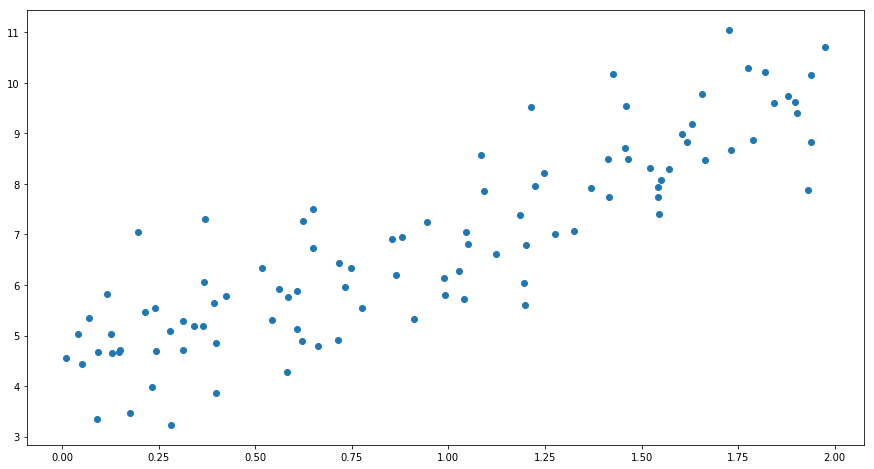

In [5]:
plt.scatter(X, y)

In [6]:
from sklearn.metrics import mean_squared_error

def train(alpha=0.01):
    np.random.seed(42)
    
    err = []
    n_epochs = 10
    theta = np.random.randn(2,1)  # random initialization
    it = 0
    for epoch in range(n_epochs):
        for i in range(m):
            y_predict = X_b.dot(theta)
            err.append(mean_squared_error(y, y_predict))
            
            if it < 10:
                style = "b-" if it > 0 else "r--"
                plt.plot(X, y_predict, style)

            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - alpha * gradients
            it += 1
            

    plt.plot(X, y, "b.")                                 
    plt.xlabel("$x_1$", fontsize=18)                     
    plt.ylabel("$y$", rotation=0, fontsize=18)           
    plt.axis([0, 2, 0, 15])                              
    plt.show()
    
    plt.plot(range(len(err)), err)

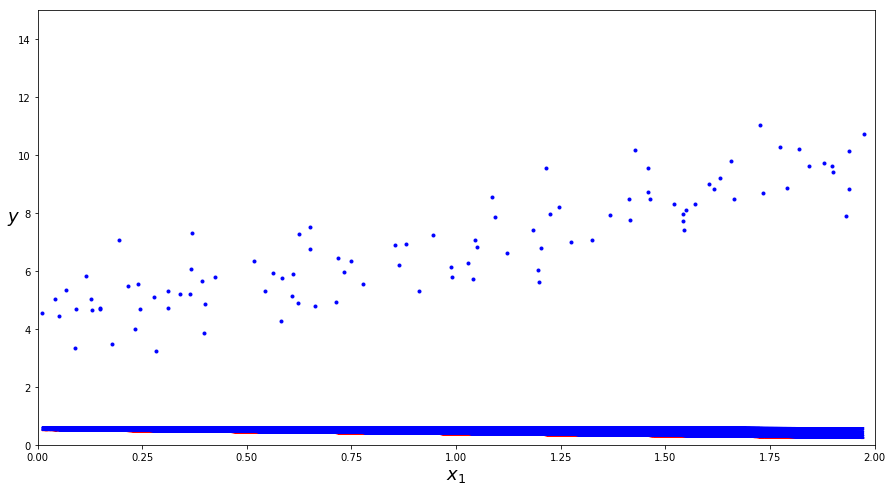

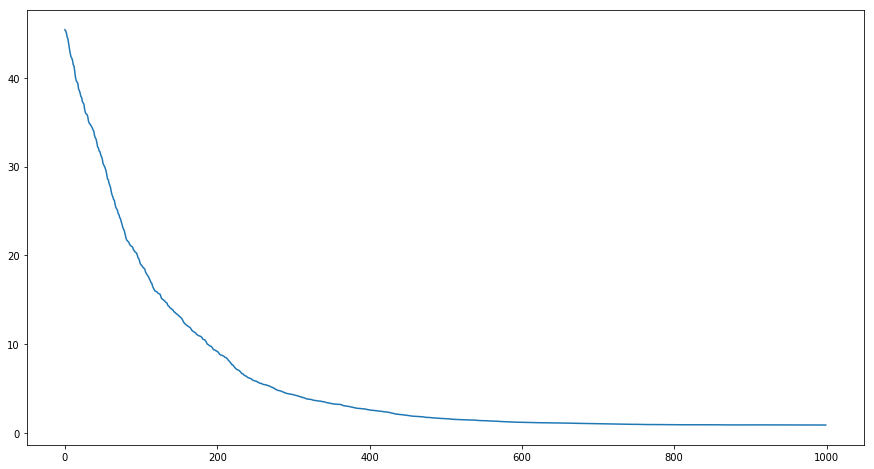

In [6]:
train(0.001)

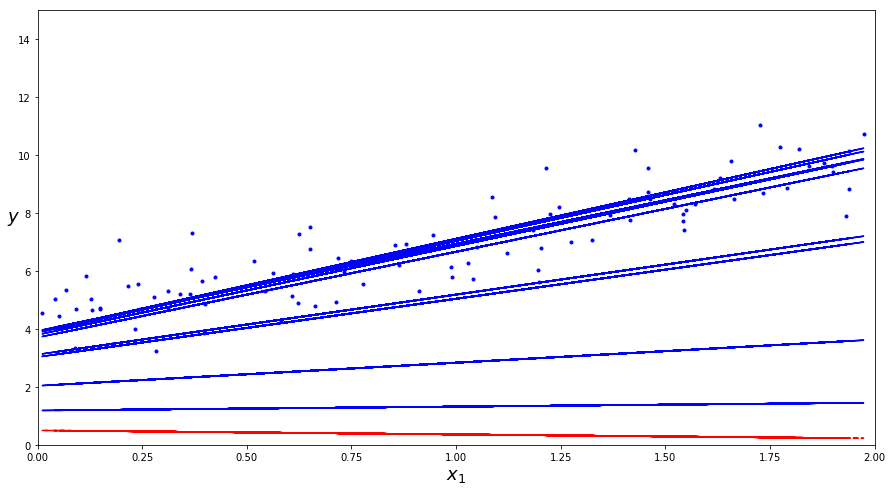

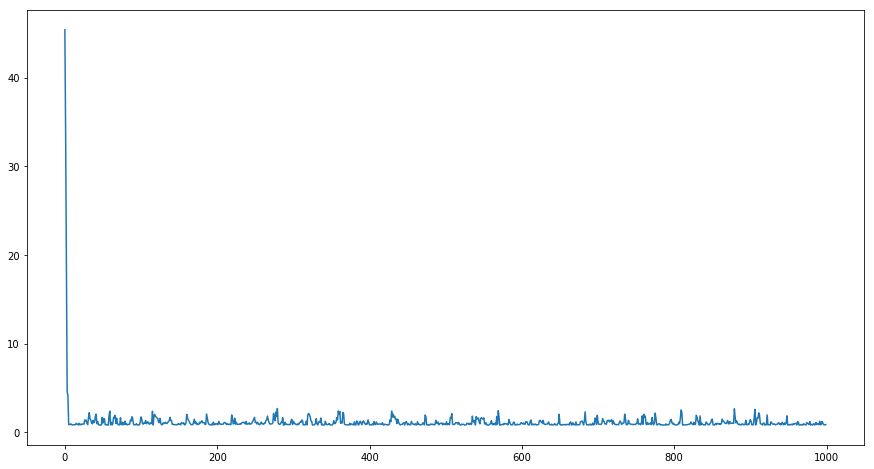

In [7]:
train(0.1)

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


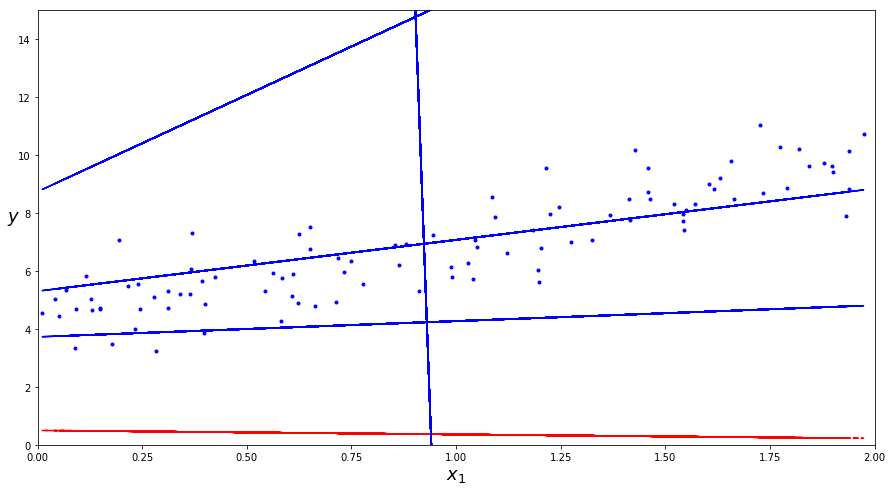

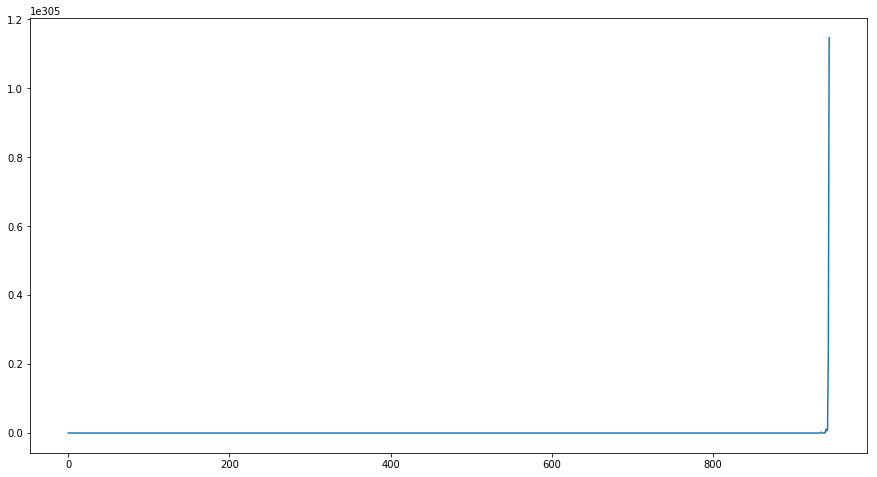

In [7]:
train(0.7)

<img src="pics/g1.png">
<img src="pics/g2.png">
<img src="pics/g3.png">

Проблемы:
* Выбрать скорость обучения
* Выбрать расписание изменения скорости обучения
* Для разреженных данных лучше иметь разную скорость для разных признаков - редко встречаемые признаки должны иметь более высокую скорость обучения
* Большое количество локальных экстремумов и плато в произвольных функциях (глубокое обучение)

Высокая дисперсия около минимума:

<img src="pics/Stogra.png">

<img src="pics/var.png">

# Метод моментов (momentum)

Идея сравнима с катящимся бильярдным шаром. Добавляем инерцию и учитываем направление движения на предыдущем шаге.

$m$ - momentum vector

$ m \leftarrow \beta m + \eta \nabla_\theta L(\theta) $  
$ \theta \leftarrow \theta - m $

* Быстрее выйдет с плато и быстрее спустится до минимума
* Может проскакивать минимум и колебаться
* еще один гиперпараметр (обычно 0.9 работает хорошо)

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
digits = load_digits()
X, y = digits.data, digits.target
X = MinMaxScaler().fit_transform(X)
max_iter = 15

In [8]:
def mlp_learn(params):
    for l, param in params:
        mlp = MLPClassifier(verbose=0, random_state=0, max_iter=max_iter, **param)
        mlp.fit(X, y)
        plt.plot(mlp.loss_curve_, label=l)
        
    plt.legend()

/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


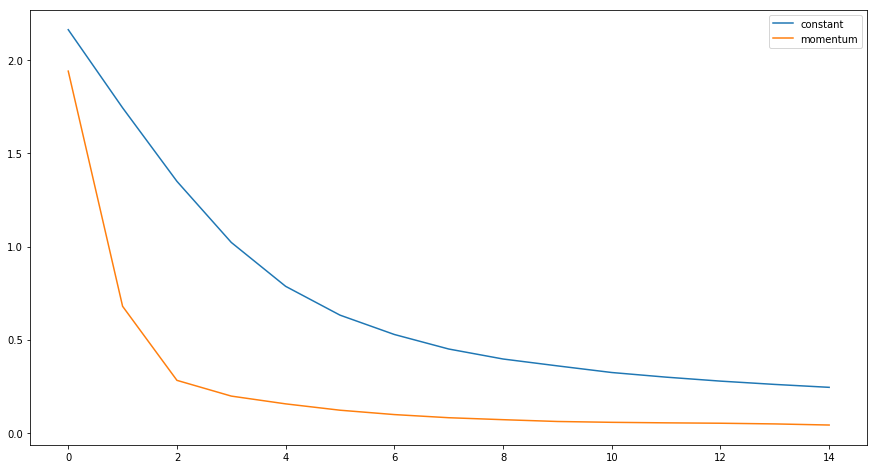

In [9]:
mlp_learn([
    ('constant', {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.2}),
    ('momentum', {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9, 
                  'nesterovs_momentum': False, 'learning_rate_init': 0.2}),
])


Что делать с перескоками?

# Nesterov accelerated gradient

Посмотреть на значение градиента не в текущей точке, а в направлении момента:  
$ m \leftarrow \beta m + \eta \nabla_\theta L(\theta + \beta m) $  
$ \theta \leftarrow \theta - m $

<img src="pics/nesterov.png">

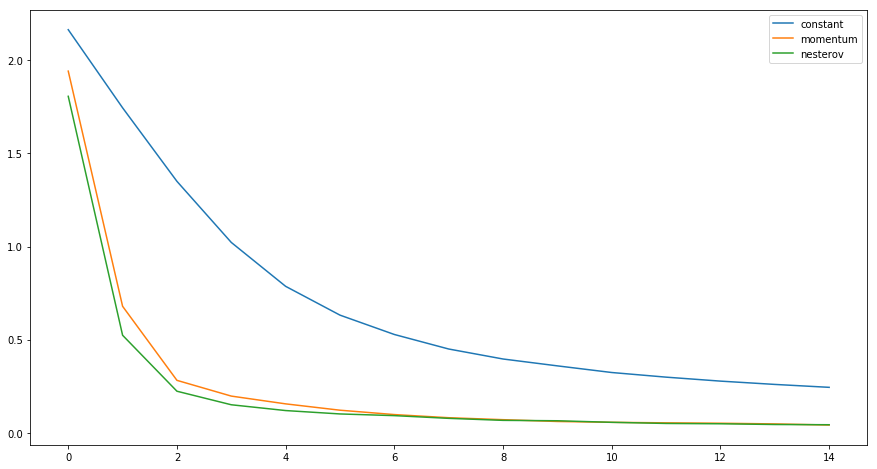

In [11]:
mlp_learn([
    ('constant', {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.2}),
    ('momentum', {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9, 
                  'nesterovs_momentum': False, 'learning_rate_init': 0.2}),
    ('nesterov', {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
                  'nesterovs_momentum': True, 'learning_rate_init': 0.2},)
])


Можно ли лучше?<br>
https://ru.wikipedia.org/wiki/Метод_Ньютона

* Метод Ньютона. Нужно считать Гессиан
* Приближения метода Ньютона - L-BFGS - строится аппроксимация обратного Гессиана. Пока что нужно считать градиент по всему датасету. Применить для сложных моделей пока что не удается - не понятно, как считать по минибатчам.

До этого скорость обучения была одинакова во всех направлениях. Давайте быстрее двигаться по тем параметрам, которые не сильно меняются (редко встречаются), и медленнее по быстроменяющимся параметрам (часто встречаются).

# Adagrad

Значение градиента на итерации $t$ по параметру $\theta_i$:

$g_{t,i} = \nabla_{\theta_i} L(\theta)$  

Для SGD:

$\theta_{t+1,i} =\theta_{t,i} - \eta\cdot g_{t,i}$  

Скорость обучения делаем изменяемой:  


$$\theta_{t+1,i} =\theta_{t,i} - \frac{\eta}{\sqrt{G_{t,ii} + \epsilon}}\cdot g_{t,i}$$

где

$G_{t,ii} $ - сумма квадратов всех $g_{t,i}$ вплоть до текущего  
$G_t$ - диагональная матрица, в которой $G_{t,ii} = G_{t-1,ii} + g_{t,i}^2$ которая накапливает общее значение градиента по всей истории обучения.


скорость обучения всё время уменьшается, но с разной скоростью для разных $\theta_i$

<img src='pics/ada.png'>

Какая есть проблема?

## Экспоненциальное сглаживание

Будем взвешивать все доступные наблюдения, при этом экспоненциально уменьшая веса по мере углубления в исторические данные. 

$$ S_t = \alpha x_t + (1 - \alpha)S_{t-1} $$

Вес $\alpha$ называется сглаживающим фактором. Он определяет, как быстро мы будем "забывать" последнее доступное истинное наблюдение. Чем меньше $\alpha$, тем больше влияния оказывают предыдущие значения, и тем сильнее сглаживается ряд.
Экспоненциальность скрывается в рекурсивности функции — каждый раз мы умножаем $(1−\alpha)$ на предыдущее значение, которое, в свою очередь, также содержало в себе $(1−\alpha)$, и так до самого начала.

# Adadelta и RMSProp

Применяем сглаживание для истории градиентов

$$G_{t,ii} = \rho G_{t-1,ii} + (1 - \rho) g_{t,i}^2$$

$$\theta_{t+1,i} =\theta_{t,i} - \frac{\eta}{\sqrt{G_{t,ii} + \epsilon}}\cdot g_{t,i}$$

Обычно $\rho=0.9$. Получаем алгоритм RMSProp.

Все еще есть темп обучения. Будем выбирать его автоматически.

Обозначим 

$$ \Delta \theta = - \frac{\eta}{RMS[g]_t + \epsilon}\cdot g_{t} $$ (со сглаживанием)

Домножим на ещё одно экспоненциальное среднее, но теперь уже от квадратов обновлений параметров, а не от градиента.
Настоящее среднее мы не знаем, аппроксимируем предыдущими шагами:



$$E[\Delta \theta^2]_t=\rho E[\Delta \theta^2]_{t-1} + (1-\rho)\Delta \theta^2 $$

$$ \Delta \theta = - \frac{RMS[\Delta \theta]_{t-1}}{RMS[g]_t}\cdot g_{t,i} $$ (со сглаживанием)

# Adam (Adaptive moment estimation)

Модификация Adagrad со сглаженными версиями среднего и
среднеквадратичного градиентов:


$$m_t=\beta_1m_{t-1} + (1-\beta_1)g_t$$
$$v_t=\beta_2v_{t-1} + (1-\beta_2)g_t^2$$

$$\theta_{t+1}=\theta_t - \frac{\eta}{\sqrt{v_t + \epsilon}}m_t$$

Рекомендации:
$\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-8}$


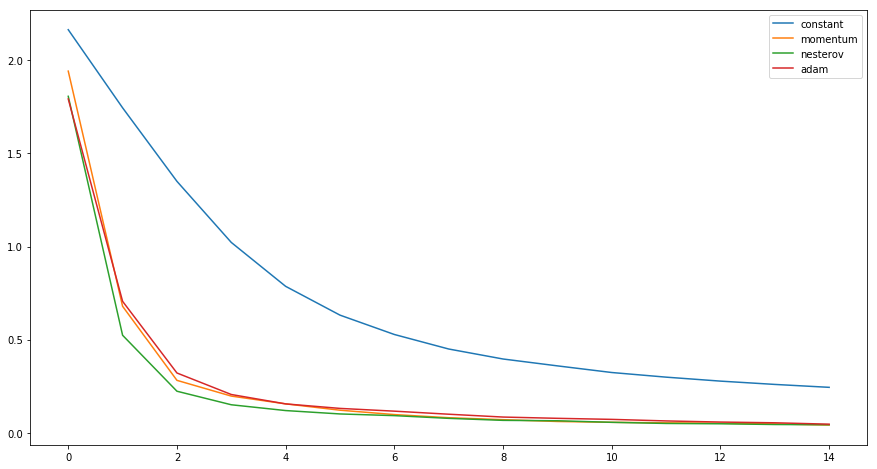

In [12]:
mlp_learn([
    ('constant', {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.2}),
    ('momentum', {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9, 
                  'nesterovs_momentum': False, 'learning_rate_init': 0.2}),
    ('nesterov', {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
                  'nesterovs_momentum': True, 'learning_rate_init': 0.2},),
    ('adam', {'solver': 'adam', 'learning_rate_init': 0.01})
])


# Сравнение

<img src="pics/contours_evaluation_optimizers.gif">

<img src="pics/saddle_point_evaluation_optimizers.gif">

### Задача
Какие критерии для остановки вы можете придумать?



















# Критерии останова
* превышен лимит по времени или числу итераций
* качество на валидации стало ухудшаться
* веса перестали изменяться значительно

In [13]:
from sklearn import datasets
X, y = datasets.make_moons(noise=0.3, random_state=0)
X = MinMaxScaler().fit_transform(X)
max_iter = 400

/Users/an/Projects/otus/otus-datamining/venv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


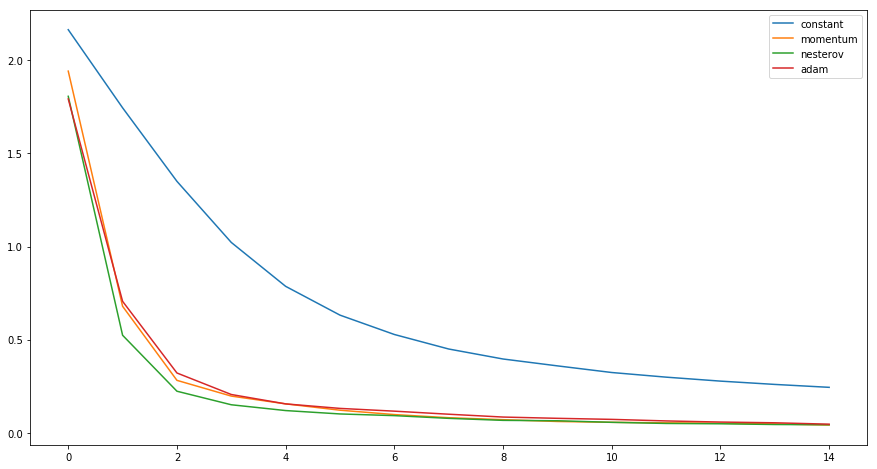

In [10]:
mlp_learn([
    ('constant', {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.2}),
    ('momentum', {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9, 
                  'nesterovs_momentum': False, 'learning_rate_init': 0.2}),
    ('nesterov', {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
                  'nesterovs_momentum': True, 'learning_rate_init': 0.2},),
    ('adam', {'solver': 'adam', 'learning_rate_init': 0.01})
])


## Практические замечания:
- все методы на практике не сильно отличаются в сходимости
- важно задумываться о параллелизуемости
- важно помнить о вычислениях на gpu

https://keras.io/optimizers/

# Дополнительные материалы
* http://ruder.io/optimizing-gradient-descent/index.html
* https://github.com/AM207/2016/tree/master/Lectures
* Гудфеллоу, "Глубокое обучение", глава 8
* https://habr.com/post/318970/
* теоретический курс http://www.machinelearning.ru/wiki/index.php?title=Momo
* обучение градиентов http://proceedings.mlr.press/v70/chen17e/chen17e.pdf
* gradient noise https://arxiv.org/abs/1511.06807